In [1]:
import moose
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
moose.le()

Elements under /
    /Msgs
    /clock
    /classes
    /postmaster



In [2]:
# # Interactive visualization of a neuron

# %run '/home/pramesh/MOOSE_STUFF/mbnet/morphutils/displaycell.py' -f '/home/pramesh/MOOSE_STUFF/CA1_Pyramidal/052714C_37.swc'

In [3]:
# %run neuron_plotter.py

# # run the above script standalone from terminal 

In [4]:
# # Code for parsing the swc  file and mapping it using matplotlib.pyplot

# file_path = '/home/pramesh/MOOSE_STUFF/CA1_Pyramidal/052714C_37.swc'

# def load_swc(filepath):
#     """
#     Loads an SWC file and returns a structured array.
#     """
#     data = []
#     with open(filepath, 'r') as f:
#         for line in f:
#             if line.startswith('#'):
#                 continue  # skip comments
#             parts = list(map(float, line.strip().split()))
#             data.append(parts)
#     return np.array(data)

# def plot_neuron_2d(data,plane,ax):
#     # data columns: n, T, x, y, z, R, P
#     for point in data:
#         n, t, x, y, z, r, parent = point
#         if parent == -1:
#             continue
            
#         parent_point = data[int(parent) - 1]  # ID indexing starts at 1
#         x2, y2, z2 = parent_point[2], parent_point[3], parent_point[4]
#         t_parent = parent_point[1]

#         # Determining color based on the type:
#         if t==4 or t_parent==4:
#             color='orange' # Apical dendrite
#         elif t==3 or t_parent==3:
#             color='blue' # Basal Dendrite
#         else:
#             color='gray' # Unknown type

        
            
#         if plane=='xy':
#             ax.plot([x, x2], [y, y2], color=color,linewidth=0.3)
            
#         elif plane=='yz':
#             ax.plot([y, y2], [z, z2], color=color, linewidth=0.3)
            
#         elif plane=='xz':
#             ax.plot([x, x2], [z, z2], color=color, linewidth=0.3)
            

#     soma_points = data[data[:,1] == 1]
#     for soma in soma_points:
#         _,_,x,y,z,r,_=soma
#         if plane=='xy':
#             ax.scatter(x,y,s=50,color='black',marker='^',zorder=4)
#         elif plane=='yz':
#             ax.scatter(y,z,s=50,color='black',marker='^',zorder=4)
#         elif plane=='xz':
#             ax.scatter(x,z,s=50,color='black',marker='^',zorder=4)

                    

#     ax.set_xlabel(plane[0])
#     ax.set_ylabel(plane[1])
#     ax.set_title(f'Neuron Morphology ({plane} Projection)')
#     ax.axis('equal')



# def plot_neuron_3d(data, ax):
#     for point in data:
#         n, t, x, y, z, r, parent = point
#         if parent == -1:
#             continue
#         parent_point = data[int(parent) - 1]
#         x2, y2, z2 = parent_point[2], parent_point[3], parent_point[4]
#         t_parent = parent_point[1]

#         if t==4 or t_parent==4:
#             color='orange' # Apical dendrite
#         elif t==3 or t_parent==3:
#             color='blue' # Basal Dendrite
#         else:
#             color='gray' # Unknown type
        
#         ax.plot([x, x2], [y, y2], [z, z2], color=color, linewidth=0.5)


#     soma_points = data[data[:,1] == 1]
#     for soma in soma_points:
#         _,_,x,y,z,r,_=soma
#         ax.scatter(x,y,z,s=50,color='black',marker='^',zorder=3)

#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')
#     ax.set_title("3D Neuron Morphology")

# #######################################################################################
# swc_data = load_swc(file_path)

# # Create a 2x2 grid of subplots
# fig = plt.figure(figsize=(14, 10))

# # 2D subplots
# ax_xy = fig.add_subplot(2, 2, 1)
# ax_yz = fig.add_subplot(2, 2, 2)
# ax_xz = fig.add_subplot(2, 2, 3)

# # 3D subplot
# ax_3d = fig.add_subplot(2, 2, 4, projection='3d')

# # Plot projections
# plot_neuron_2d(swc_data, 'xy', ax_xy)
# plot_neuron_2d(swc_data, 'yz', ax_yz)
# plot_neuron_2d(swc_data, 'xz', ax_xz)
# plot_neuron_3d(swc_data, ax_3d)

# plt.tight_layout()
# plt.show()

In [5]:
sim=moose.Neutral('/sim')
data=moose.Neutral('/data')
library=moose.Neutral('/library')

In [6]:
# Loading the cell model

# NOTE: While transforming the swc file to .p file using shapeshifter.py, arguments of rm,cm and ri were passed to calculate the resistances and capacitances

cell=moose.loadModel('/home/pramesh/ME/MOOSE_STUFF/CA1_Pyramidal/052714C_37_condensed.p' , '/sim/cell')

# Compartments formed are cylindrical

In [7]:
# global cm was set 0.016 in .p file, but for soma it is 0.01. We will change it for the soma
sarea_1_1 = moose.element('/sim/cell/1_1').diameter * np.pi * moose.element('/sim/cell/1_1').length
print(f'Cm before : {moose.element('/sim/cell/1_1').Cm}')
moose.element('/sim/cell/1_1').Cm= 0.01 * sarea_1_1
print(f'Cm after : {moose.element('/sim/cell/1_1').Cm}')

Cm before : 2.0368427250945052e-11
Cm after : 1.2730267031840658e-11


In [8]:
# We will create a dictionary containing the compartments only 
# The keys will be the names of the compartments and the values the compartments themselves

comps={}
for element in cell.children:
    if element.type=='Compartment':
        comps[element.name]=element

print(f'The dictionary has {len(comps.keys())} compartments')

# Now, we can access each compartment and calculate the length of the compartment from the soma


The dictionary has 370 compartments


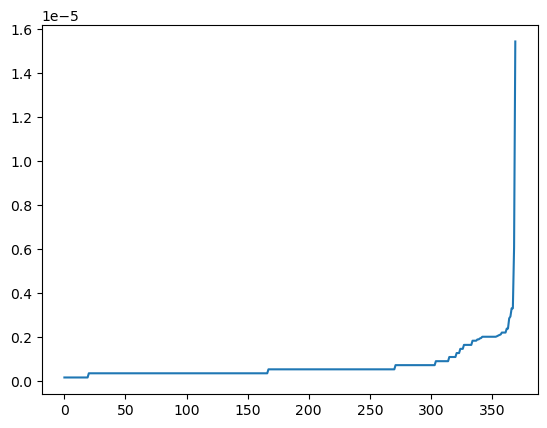

In [9]:
# Some lines to check if diameters are as expected or not

diameters=[]
for x in comps.values():
    diameters.append(x.diameter)

plt.plot(sorted(diameters))
plt.show()

# The lengths are steadily increasing and this is expected as compartments having similar lengths were merged using shape_shifter.py
# The last diameter is much greater as that is the soma.

In [10]:
# When we use moose.loadModel(), it sets up connections between the compartments, but it is only unidirectional.
# To imitate a biophysical neuron, we need to manually introduce the 

In [11]:
# WE WILL CALCULATE THE LENGTH OF A COMPARTMENT FROM THE SOMA USING RECURSION

def compute_path_lengths_from_soma(comps, soma_name='1_1'):
    """
    Computes shortest path lengths from the soma to all other compartments using recursion.
    
    Parameters:
        comps (dict): Dictionary mapping compartment names to MOOSE Compartment objects.
        soma_name (str): Name of the soma compartment.

    Returns:
        dict: Mapping of compartment names to path lengths from the soma.
    """

    lengths = {}

    def dfs(current_name, path_length):
        if current_name in lengths:
            if path_length >= lengths[current_name]:
                return  # Already visited via a shorter or equal path
        lengths[current_name] = path_length

        current_comp = comps[current_name]
        for neighbor_comp in current_comp.neighbors('axial'):
            neighbor_name = neighbor_comp.name
            if neighbor_name not in comps:
                continue  # Skip if not in the comps dict
            dfs(neighbor_name, path_length + neighbor_comp.length)

    dfs(soma_name, 0.0)

    for k in lengths:
        lengths[k]*=1e6
    return lengths

lengths_dict=compute_path_lengths_from_soma(comps)
lengths_dict    

{'1_1': 0.0,
 '2_3': 8.077855631911232,
 '5_3': 13.168036178807384,
 '10_3': 16.988456705398665,
 '14_3': 20.49950953895159,
 '19_3': 28.40159293511997,
 '22_3': 32.59798197809489,
 '28_3': 25.631456705398662,
 '90_3': 68.27065240606827,
 '155_3': 111.14224655650779,
 '206_3': 153.90901422721208,
 '233_3': 173.96301422721208,
 '238_3': 178.88720410982222,
 '244_3': 32.79531048670939,
 '250_3': 37.59181233701655,
 '251_3': 9.078839772239624,
 '271_3': 30.903780299077262,
 '278_3': 39.59998199867002,
 '323_3': 82.08562170198626,
 '372_3': 124.87899808198225,
 '375_3': 126.35217186670691,
 '383_3': 136.16322869051547,
 '424_3': 82.55950177019447,
 '452_3': 125.29553307868169,
 '461_3': 133.82794504716986,
 '465_3': 139.1085831714878,
 '467_3': 34.661780299077265,
 '482_3': 44.807780299077265,
 '531_3': 87.58878029907727,
 '579_3': 129.95178029907726,
 '616_3': 172.71378029907726,
 '639_3': 192.58078029907725,
 '640_3': 9.743678648744527,
 '642_3': 12.873565228159187,
 '645_3': 16.01456522

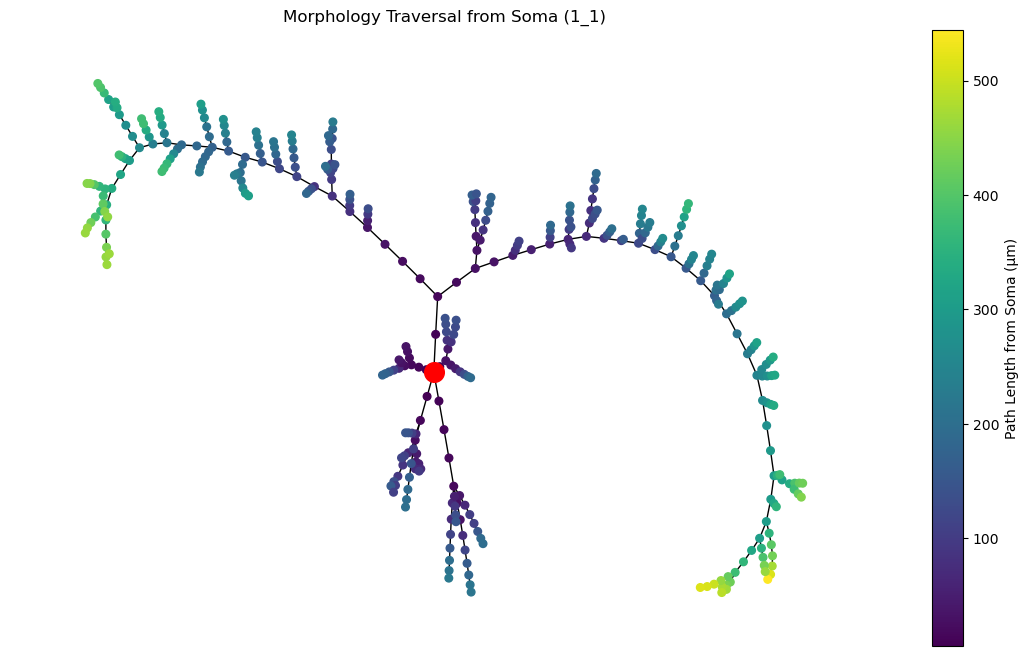

In [12]:
# Step 1: Create the graph
G = nx.Graph()

# Add edges between compartments based on axial connections
for name, comp in comps.items():
    for neighbor in comp.neighbors('axial'):
        neighbor_name = neighbor.name
        G.add_edge(name, neighbor_name)

# Get the path lengths from your function
lengths_dict = compute_path_lengths_from_soma(comps, '1_1')

# Create a color map for each node based on its path length
node_colors = [lengths_dict.get(node, 0.0) for node in G.nodes()]

# Layout
pos = nx.spring_layout(G, seed=42,k=1,iterations=5000)

# Create figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Draw non-soma nodes with color
nodes = nx.draw_networkx_nodes(
    G, pos,
    nodelist=[n for n in G.nodes() if n != '1_1'],
    node_color=[lengths_dict.get(n, 0.0) for n in G.nodes() if n != '1_1'],
    node_size=30,
    cmap=plt.cm.viridis,
    ax=ax
)

# Draw edges
nx.draw_networkx_edges(G, pos, ax=ax)

# Draw soma node (red)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=['1_1'],
    node_color='red',
    node_size=200,
    ax=ax
)

# Optional: omit labels to reduce clutter
# nx.draw_networkx_labels(G, pos, font_size=6, ax=ax)

# Add a colorbar
fig.colorbar(nodes, ax=ax, label="Path Length from Soma (µm)")

# Final touches
ax.set_title("Morphology Traversal from Soma (1_1)")
ax.axis('off')
plt.show()


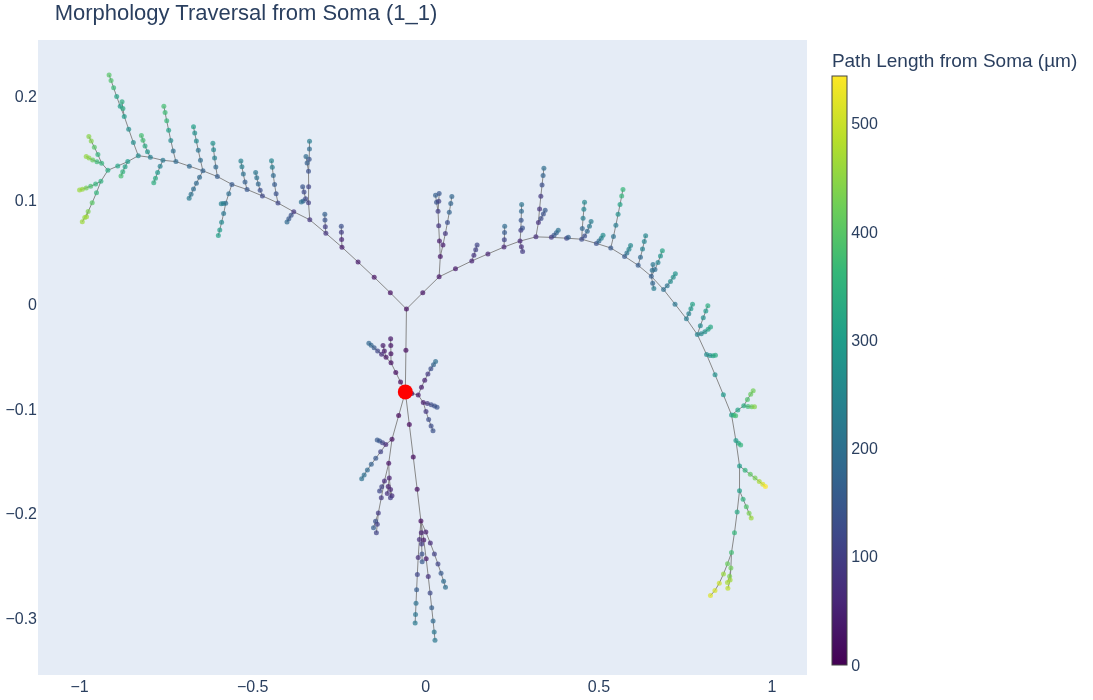

In [13]:
import plotly.graph_objects as go
import networkx as nx

# Reuse your network
G = nx.Graph()

# Add edges from comps
for name, comp in comps.items():
    for neighbor in comp.neighbors('axial'):
        neighbor_name = neighbor.name
        G.add_edge(name, neighbor_name)

# Path lengths from soma
lengths_dict = compute_path_lengths_from_soma(comps, '1_1')

# Get positions using spring layout
pos = nx.spring_layout(G, seed=42, k=0.8, iterations=5000)

# Extract coordinates
edge_x = []
edge_y = []
for u, v in G.edges():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

# Create edge traces
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Node positions
node_x = []
node_y = []
node_color = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_color.append(lengths_dict.get(node, 0.0))

# Create node trace
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    marker=dict(
        showscale=True,
        colorscale='Viridis',
        color=node_color,
        size=[12 if node == '1_1' else 5 for node in G.nodes()],
        colorbar=dict(
            thickness=15,
            title='Path Length from Soma (µm)',
            xanchor='left',
        ),
        line_width=0
    ),
    text=[f'{node}<br>Length: {lengths_dict.get(node, 0.0):.2f} µm' for node in G.nodes()],
    hoverinfo='text'
)

# Red highlight for soma
highlight_soma = go.Scatter(
    x=[pos['1_1'][0]],
    y=[pos['1_1'][1]],
    mode='markers',
    marker=dict(size=15, color='red'),
    name='Soma'
)

# Final plot
fig = go.Figure(data=[edge_trace, node_trace, highlight_soma],
                layout=go.Layout(
                    title='Morphology Traversal from Soma (1_1)',
                    font=dict(size=16),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False),
                    height=700
                ))

fig.show()
fig.write_html("morphology_graph.html")


In [14]:
# CELL FOR DEFINING FUNCTIONS:
# 1. get_channels_prot(): create a neutral container containing all the channels pertaining to a certain compartment
# 2. get_pulsegen_proto(): pulsegens for corresponding compartments
# 3. get_spikegen_proto(): spikegen for replicating synaptic input. Will only be used in certain cases 

if not moose.exists('/library/channels'):
    moose.Neutral('/library/channels')

def get_channels_proto(length_from_soma):
    
    channels = moose.Neutral(f'/library/channels/{int(length_from_soma)}')

    # creating the channels
    Nachan=moose.HHChannel(f'{channels.path}/Nachan')
    KDRchan=moose.HHChannel(f'{channels.path}/KDRchan')
    KAchan=moose.HHChannel(f'{channels.path}/KAchan')

    # setting channel properties
    Nachan.Gbar = 120
    KDRchan.Gbar = 75
    KAchan.Gbar = 70 + 110 * (length_from_soma * 1e-6 / 100) # need to convert to micrometer before calculating

    Nachan.Ek = 58e-3
    KDRchan.Ek = KAchan.Ek = -80e-3

    Nachan.Xpower = 3
    Nachan.Ypower = 1
    KDRchan.Xpower = 4
    KAchan.Xpower = 4
    KAchan.Ypower = 1

    # voltage setup
    vmin = -100e-3
    vmax = 100e-3
    vdivs = 2000
    v = np.linspace(vmin,vmax,vdivs)

    # Creating gates
    Nam_gate = moose.HHGate(f'{Nachan.path}/gateX')
    Nah_gate = moose.HHGate(f'{Nachan.path}/gateY')
    KDRn_gate = moose.HHGate(f'{KDRchan.path}/gateX')
    KAm_gate = moose.HHGate(f'{KAchan.path}/gateX')
    KAh_gate = moose.HHGate(f'{KAchan.path}/gateY')

    for gate in [Nam_gate,Nah_gate,KDRn_gate,KAm_gate,KAh_gate]:
        gate.min, gate.max, gate.divs = vmin, vmax, vdivs


    # Setting gating particle expressions:

#############################################################################################################
    
    #Na channel gates:
    Nam_alpha = (1e3 * 0.182 * (1e3 * v + 32.5)) / (1 - np.exp(-(1e3 * v + 32.5) / 4.5))
    Nam_beta = (1e3 * 0.124 * (-1e3 * v - 32.5)) / (1 - np.exp((1e3 * v + 32.5) / 4.5))
    Nah_alpha = (1e3 * 0.08 * (1e3 * v + 40)) / (1 - np.exp(-(1e3 * v + 40) / 3))
    Nah_beta = (1e3 * 0.0005 * (-1e3 * v - 10)) / (1 - np.exp((1e3 * v + 10) / 5))

    Na_tau_m = 0.8 / (Nam_alpha + Nam_beta)
    Na_m_inf = Nam_alpha / (Nam_alpha + Nam_beta)
    Na_tau_h = 1 / (Nah_alpha + Nah_beta)
    Na_h_inf = 1e3 / (1 + np.exp((1e3 * v + 58) / 5))

    Nam_gate.tableA = Na_m_inf / Na_tau_m
    Nam_gate.tableB = 1.0 / Na_tau_m
    Nah_gate.tableA = Na_h_inf / Na_tau_h
    Nah_gate.tableB = 1.0 / Na_tau_h

    Nam_gate.useInterpolation = True
    Nah_gate.useInterpolation = True

#############################################################################################################

    # KDR channel gates:
    KDRn_alpha = (-1e3 * 0.0035 * (1e3 * v + 30)) / (np.exp((1e3 * v + 30) / -13) - 1)
    KDRn_beta =  (1e3 * 0.0035 * (1e3 * v + 30)) / (np.exp((1e3 * v + 30) / 13) - 1)

    KDR_tau_n = 1.8 # ms
    KDR_n_inf = KDRn_alpha / (KDRn_alpha + KDRn_beta)

    KDRn_gate.tableA = KDR_n_inf / KDR_tau_n
    KDRn_gate.tableB = np.full(KDRn_gate.divs + 1, 1.0 / KDR_tau_n)

    KDRn_gate.useInterpolation = True

#############################################################################################################

    # KA gates: proximal vs distal
    if length_from_soma <= 100: # proximal
        x = 1e3 * v + 21.3
        KAm_alpha = (-10 * x) / (np.exp(x / -35) - 1)
        KAm_beta = (10 * x) / (np.exp(x / 35) - 1)
    elif length_from_soma > 100: # distal
        x = 1e3 * v + 34.4
        KAm_alpha = (-10 * x) / (np.exp(x / -21) - 1)
        KAm_beta  = (10 * x) / (np.exp(x / 21) - 1)

    
    KAh_alpha = (-10 * (1e3 * v + 58)) / (np.exp((1e3 * v + 58) / 8.2) - 1)
    KAh_beta = (10 * (1e3 * v + 58)) / (np.exp((1e3 * v + 58) / -8.2) - 1)

    KA_m_inf = KAm_alpha / (KAm_alpha + KAm_beta)
    KA_tau_m = 0.2  # ms
    KA_h_inf = KAh_alpha / (KAh_alpha + KAh_beta)

    KA_tau_h = np.where(v > -20e-3,
                        5.0 + ((2.6 * (v * 1e3 + 20)) / 10),
                        5.0)

    KAm_gate.tableA = KA_m_inf / KA_tau_m
    KAm_gate.tableB = np.full(KAm_gate.divs + 1, 1.0 / KA_tau_m)
    KAh_gate.tableA = KA_h_inf / KA_tau_h
    KAh_gate.tableB = 1.0 / KA_tau_h

    KAm_gate.useInterpolation = True
    KAh_gate.useInterpolation = True

################################################################################################################

    # Creating Synaptic channel:
    synchan = moose.SynChan(f'{channels.path}/synchan')
    # need to connect synchan with compartment via 'channel'
    synh = moose.SimpleSynHandler(f'{synchan.path}/synhandler')
    moose.connect(synh,'activationOut',synchan,'activation')

    synh.numSynapses = 1

    synh.synapse[0].weight = 1.0
    synh.synapse[0].delay = 1e-3

    synchan.Ek=0.0
    synchan.tau1 = 1.5e-3
    synchan.tau2 = np.random.uniform(5e-3,10e-3)
    synchan.Gbar = 1.5e-9
    

    return channels


def get_pulsegen_proto():
    pulsegen_path = f'{library.path}/pulsegen'
    if moose.exists(pulsegen_path):
        return moose.element(pulsegen_path)

    pulsegen_proto = moose.PulseGen(pulsegen_path)

    # We will set all the parameters of the pulsegen during the experiment
    return pulsegen_proto


def get_spikegen_proto():
    spikegen_path = f'{library.path}/spikegen'
    if moose.exists(spikegen_path):
        return moose.element(spikegen_path)

    spikegen_proto = moose.SpikeGen(spikegen_path)

    # We will set parameters at the time of the experiment
    return spikegen_proto

In [15]:
for element in ['Channels','Pulsegens','Spikegens']:
    moose.Neutral(f'/sim/{element}')

for element in ['Vm','Channels','Pulsegens','Spikegens']:
    moose.Neutral(f'/data/{element}')
    # if element == 'Channels':
    #     for chan_name in ['Nachan','KDRchan','KAchan']:
    #         moose.Neutral(f'/data/{element}/{chan_name}')



Pulsegens={}
Spikegens={}
vm_tabs={}
pulsegen_tabs={}
spikegen_tabs={}
nachan_tabs={}
kdrchan_tabs={}
kachan_tabs={}
synchan_tabs={}

# creating prototypes
pulsegen_hold = get_pulsegen_proto()
spikegen_hold = get_spikegen_proto()

for name,comp in comps.items():
    
    length_from_soma = lengths_dict[name] # getting length of comp from soma
    
    # creating channels neutral object
    channels_hold = get_channels_proto(length_from_soma) 
    
    
    # copying the prototypes to their respective neutral containers
    moose.copy(channels_hold,f'{moose.element('/sim/Channels').path}', name)
    moose.copy(pulsegen_hold,f'{moose.element('/sim/Pulsegens').path}', name)
    moose.copy(spikegen_hold,f'{moose.element('/sim/Spikegens').path}', name)

    Pulsegens[name] = moose.element(f'/sim/Pulsegens/{name}')
    Spikegens[name] = moose.element(f'/sim/Spikegens/{name}')

    # setting up connections
    moose.connect(moose.element(f'{channels_hold.path}/Nachan'),'channel',comp,'channel')
    moose.connect(moose.element(f'{channels_hold.path}/KDRchan'),'channel',comp,'channel')
    moose.connect(moose.element(f'{channels_hold.path}/KAchan'),'channel',comp,'channel')
    moose.connect(moose.element(f'{channels_hold.path}/synchan'),'channel',comp,'channel')
    moose.connect(moose.element(f'/sim/Spikegens/{name}'),'spikeOut',
                  moose.element(f'/sim/Channels/{name}/synchan/synhandler').synapse[0],'addSpike')

    # WE WILL NOT SET UP THE CONNECTIONS OF PULSEGENS WITH THEIR COMPARTMENTS NOW AS THE CONNECTIONS 
    # WILL CHANGE (they will be connected to either comp or spikegen) DEPENDING ON THE EXPERIMENT BEING PERFORMED

    # setting up the tables and connecting them
    vm_tab=moose.Table(f'/data/Vm/{name}')
    moose.connect(vm_tab,'requestOut',comp,'getVm')
    vm_tabs[name]=vm_tab

    pulsegen_tab=moose.Table(f'/data/Pulsegens/{name}')
    moose.connect(pulsegen_tab,'requestOut',moose.element(f'/sim/Pulsegens/{name}'),'getOutputValue')
    pulsegen_tabs[name]=pulsegen_tab

    spikegen_tab=moose.Table(f'/data/Spikegens/{name}')
    moose.connect(moose.element(f'/sim/Spikegens/{name}'),'spikeOut',spikegen_tab,'input')
    spikegen_tabs[name]=spikegen_tab

    moose.Neutral(f'/data/Channels/{name}')

    nachan_tab=moose.Table(f'/data/Channels/{name}/Nachan')
    moose.connect(moose.element(f'data/Channels/{name}/Nachan'),'requestOut',moose.element(f'/sim/Channels/{name}/Nachan'),'getGk')
    nachan_tabs[name]=nachan_tab

    KDRchan_tab=moose.Table(f'/data/Channels/{name}/KDRchan')
    moose.connect(moose.element(f'data/Channels/{name}/KDRchan'),'requestOut',moose.element(f'/sim/Channels/{name}/KDRchan'),'getGk')
    kdrchan_tabs[name]=KDRchan_tab

    KAchan_tab=moose.Table(f'/data/Channels/{name}/KAchan')
    moose.connect(moose.element(f'data/Channels/{name}/KAchan'),'requestOut',moose.element(f'/sim/Channels/{name}/KAchan'),'getGk')
    kachan_tabs[name]=KAchan_tab

    synchan_tab=moose.Table(f'/data/Channels/{name}/synchan')
    moose.connect(moose.element(f'data/Channels/{name}/synchan'),'requestOut',moose.element(f'/sim/Channels/{name}/synchan'),'getGk')
    synchan_tabs[name]=synchan_tab

    moose.delete(channels_hold.path)
    
        

## Now, to run the simulations